In [322]:
import pandas as pd

df = pd.read_csv("../data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [324]:
df["Make"].value_counts()

Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyke

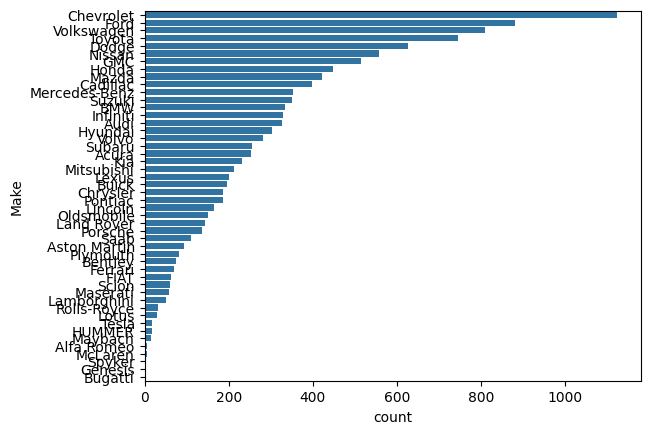

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.Figure(figsize=(12,8))
sns.countplot(df["Make"], order=df["Make"].value_counts().index)
plt.show()

In [326]:

make_counts = df["Make"].value_counts()

makes_to_keep = make_counts[make_counts >= 100].index

df = df[df["Make"].isin(makes_to_keep)]


In [327]:
# Ziel: ersetze NAs in object cols durch "unknown" und in numeric cols als -1

def replace_na(col):
    if isinstance(col, (int, float)):
        return col.fillna(-1)
    return col.fillna("unknown")
df = df.apply(replace_na)


In [328]:

from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder


target = "Make"
df = df.drop(["Model", "Popularity"], axis=1)
enc = OrdinalEncoder()


X = enc.fit_transform(df.drop(target, axis=1).astype(str))
# X[np.isnan(X)] = -1

y = df[target]
# y.fillna("Unknown")

pd.DataFrame(X, columns= df.drop(target, axis=1).columns)

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,21.0,8.0,197.0,6.0,3.0,3.0,0.0,29.0,0.0,8.0,21.0,18.0,4455.0
1,21.0,8.0,173.0,6.0,3.0,3.0,0.0,58.0,0.0,6.0,23.0,18.0,3994.0
2,21.0,8.0,173.0,6.0,3.0,3.0,0.0,55.0,0.0,8.0,23.0,19.0,3517.0
3,21.0,8.0,118.0,6.0,3.0,3.0,0.0,58.0,0.0,8.0,23.0,17.0,2473.0
4,21.0,8.0,118.0,6.0,3.0,3.0,0.0,54.0,0.0,6.0,23.0,17.0,3263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11229,22.0,8.0,173.0,6.0,1.0,0.0,2.0,11.0,2.0,2.0,18.0,15.0,4454.0
11230,22.0,8.0,173.0,6.0,1.0,0.0,2.0,11.0,2.0,2.0,18.0,15.0,4983.0
11231,22.0,8.0,173.0,6.0,1.0,0.0,2.0,11.0,2.0,2.0,18.0,15.0,4728.0
11232,23.0,7.0,173.0,6.0,1.0,0.0,2.0,11.0,2.0,2.0,18.0,15.0,4742.0


In [329]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=73)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)


DecisionTreeClassifier()

In [330]:
X_test[10]

array([1.900e+01, 9.000e+00, 1.020e+02, 6.000e+00, 1.000e+00, 1.000e+00,
       2.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 1.400e+01, 1.000e+01,
       2.957e+03])

In [331]:
y_test.reset_index(drop=True)[10]

'Ford'

In [332]:
model.predict([X_test[10]])

array(['Ford'], dtype=object)

In [333]:
from sklearn.metrics import classification_report



print("Train Report: ")
print(classification_report(y_train, model.predict(X_train), zero_division=0))

Train Report: 
               precision    recall  f1-score   support

        Acura       1.00      1.00      1.00       200
         Audi       1.00      1.00      1.00       271
          BMW       1.00      1.00      1.00       267
        Buick       0.99      0.99      0.99       160
     Cadillac       1.00      1.00      1.00       312
    Chevrolet       0.98      1.00      0.99       887
     Chrysler       1.00      1.00      1.00       156
        Dodge       1.00      1.00      1.00       492
         Ford       1.00      1.00      1.00       715
          GMC       1.00      0.95      0.98       410
        Honda       1.00      1.00      1.00       365
      Hyundai       1.00      1.00      1.00       239
     Infiniti       1.00      1.00      1.00       261
          Kia       1.00      1.00      1.00       180
   Land Rover       1.00      1.00      1.00       121
        Lexus       1.00      1.00      1.00       165
      Lincoln       1.00      1.00      1.00     

In [334]:
print("Test Report: ")
print(classification_report(y_test, model.predict(X_test), zero_division=0))

Test Report: 
               precision    recall  f1-score   support

        Acura       0.89      0.98      0.94        52
         Audi       0.98      0.95      0.96        57
          BMW       0.94      0.91      0.92        67
        Buick       0.71      0.83      0.77        36
     Cadillac       0.90      0.82      0.86        85
    Chevrolet       0.75      0.75      0.75       236
     Chrysler       0.81      0.71      0.76        31
        Dodge       0.89      0.92      0.90       134
         Ford       0.97      0.95      0.96       166
          GMC       0.56      0.56      0.56       105
        Honda       0.96      0.96      0.96        84
      Hyundai       0.89      0.88      0.88        64
     Infiniti       0.92      0.88      0.90        69
          Kia       0.77      0.73      0.75        51
   Land Rover       0.90      0.86      0.88        22
        Lexus       0.82      0.84      0.83        37
      Lincoln       0.81      0.91      0.85      

In [335]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train, )

In [336]:

smote_model = DecisionTreeClassifier()

smote_model.fit(X_train_smoted, y_train_smoted)

DecisionTreeClassifier()

In [337]:
# from sklearn.metrics import classification_report
print("Train Report: ")
print(classification_report(y_train_smoted,
      smote_model.predict(X_train_smoted), zero_division=0))

Train Report: 
               precision    recall  f1-score   support

        Acura       1.00      1.00      1.00       887
         Audi       1.00      1.00      1.00       887
          BMW       1.00      1.00      1.00       887
        Buick       1.00      1.00      1.00       887
     Cadillac       1.00      1.00      1.00       887
    Chevrolet       0.98      1.00      0.99       887
     Chrysler       1.00      1.00      1.00       887
        Dodge       1.00      1.00      1.00       887
         Ford       1.00      1.00      1.00       887
          GMC       1.00      0.98      0.99       887
        Honda       1.00      1.00      1.00       887
      Hyundai       1.00      1.00      1.00       887
     Infiniti       1.00      1.00      1.00       887
          Kia       1.00      1.00      1.00       887
   Land Rover       1.00      1.00      1.00       887
        Lexus       1.00      1.00      1.00       887
      Lincoln       1.00      1.00      1.00     

In [338]:
print("Test Report: ")
print(classification_report(y_test, smote_model.predict(X_test), zero_division=0))

Test Report: 
               precision    recall  f1-score   support

        Acura       0.84      0.90      0.87        52
         Audi       0.89      0.88      0.88        57
          BMW       0.89      0.87      0.88        67
        Buick       0.57      0.69      0.62        36
     Cadillac       0.97      0.88      0.93        85
    Chevrolet       0.76      0.71      0.74       236
     Chrysler       0.49      0.65      0.56        31
        Dodge       0.88      0.84      0.86       134
         Ford       0.95      0.94      0.95       166
          GMC       0.62      0.62      0.62       105
        Honda       0.91      0.95      0.93        84
      Hyundai       0.87      0.81      0.84        64
     Infiniti       0.86      0.87      0.86        69
          Kia       0.79      0.82      0.81        51
   Land Rover       0.84      0.95      0.89        22
        Lexus       0.71      0.78      0.74        37
      Lincoln       0.74      0.88      0.80      

In [339]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Scale the SMOTE training data
X_train_smoted_scaled = scaler.fit_transform(X_train_smoted)

Text(0, 0.5, 'cumulative explained variance')

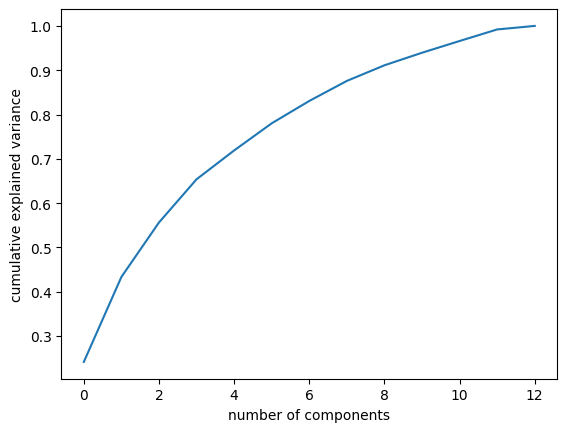

In [340]:
from sklearn.decomposition import PCA
import numpy as np


pca = PCA().fit(X_train_smoted_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [341]:
pca = PCA(n_components=7).fit(X_train_smoted_scaled)

X_train_pca = pca.transform(X_train_smoted_scaled)

model_smote_pca = DecisionTreeClassifier()

model_smote_pca.fit(X_train_pca, y_train_smoted)

DecisionTreeClassifier()

In [342]:
print("Train Report: ")
print(classification_report(y_train_smoted,
      model_smote_pca.predict(X_train_pca), zero_division=0))

Train Report: 
               precision    recall  f1-score   support

        Acura       1.00      1.00      1.00       887
         Audi       1.00      1.00      1.00       887
          BMW       1.00      1.00      1.00       887
        Buick       1.00      1.00      1.00       887
     Cadillac       1.00      1.00      1.00       887
    Chevrolet       0.98      1.00      0.99       887
     Chrysler       1.00      1.00      1.00       887
        Dodge       1.00      1.00      1.00       887
         Ford       1.00      1.00      1.00       887
          GMC       1.00      0.98      0.99       887
        Honda       1.00      1.00      1.00       887
      Hyundai       1.00      1.00      1.00       887
     Infiniti       1.00      1.00      1.00       887
          Kia       1.00      1.00      1.00       887
   Land Rover       1.00      1.00      1.00       887
        Lexus       1.00      1.00      1.00       887
      Lincoln       1.00      1.00      1.00     

In [343]:
X_test_pca = pca.transform(X_test_scaled)

print("Test Report: ")
print(classification_report(y_test,
      model_smote_pca.predict(X_test_pca), zero_division=0))

Test Report: 
               precision    recall  f1-score   support

        Acura       0.50      0.62      0.55        52
         Audi       0.58      0.77      0.66        57
          BMW       0.58      0.46      0.52        67
        Buick       0.30      0.61      0.40        36
     Cadillac       0.64      0.52      0.57        85
    Chevrolet       0.54      0.31      0.39       236
     Chrysler       0.32      0.58      0.41        31
        Dodge       0.61      0.49      0.55       134
         Ford       0.57      0.42      0.49       166
          GMC       0.33      0.32      0.33       105
        Honda       0.47      0.52      0.49        84
      Hyundai       0.28      0.30      0.29        64
     Infiniti       0.59      0.54      0.56        69
          Kia       0.31      0.61      0.41        51
   Land Rover       0.63      0.77      0.69        22
        Lexus       0.42      0.76      0.54        37
      Lincoln       0.39      0.47      0.43      

In [345]:
smote = SMOTE()
X_smoted_integer = 

pd.DataFrame(X_train_smoted, columns=df.drop("Make", axis=1).columns)

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,2.000000,9.000000,305.000000,4.000000,3.000000,2.000000,0.0,41.000000,0.0,0.000000,25.000000,24.000000,777.000000
1,26.000000,4.000000,208.000000,7.000000,1.000000,1.000000,2.0,32.000000,1.0,3.000000,17.000000,15.000000,4693.000000
2,3.000000,9.000000,93.000000,7.000000,1.000000,2.000000,2.0,54.000000,1.0,14.000000,18.000000,14.000000,777.000000
3,26.000000,9.000000,93.000000,4.000000,1.000000,2.000000,2.0,53.000000,2.0,14.000000,34.000000,39.000000,2222.000000
4,25.000000,9.000000,133.000000,6.000000,1.000000,2.000000,2.0,0.000000,2.0,3.000000,20.000000,17.000000,3595.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26605,2.000000,9.000000,12.000000,4.000000,1.000000,3.000000,2.0,54.000000,2.0,14.636245,21.000000,17.000000,777.000000
26606,24.745247,8.581749,130.699620,5.209125,1.000000,0.418251,2.0,22.365020,2.0,5.509506,21.209125,17.790875,3722.117871
26607,25.152544,9.000000,127.000000,5.847456,1.000000,0.000000,2.0,17.050875,2.0,3.838991,20.381359,17.305088,4315.694912
26608,8.800498,9.000000,59.790544,5.199502,2.600995,2.199502,2.0,54.000000,2.0,14.000000,20.401493,17.401493,1127.503950
